In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt



In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
EPOCHS=2



In [7]:
# # logistic regression for feature importance
# from sklearn.datasets import make_classification
# from sklearn.linear_model import LogisticRegression
# from matplotlib import pyplot
# # define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# # define the model
# model = LogisticRegression()
# # fit the model
# model.fit(X, y)
# # get importance
# importance = model.coef_[0]
# # summarize feature importance
# for i,v in enumerate(importance):
#  print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

In [8]:

# # linear regression feature importance
# from sklearn.datasets import make_regression
# from sklearn.linear_model import LinearRegression
# from matplotlib import pyplot
# # define dataset
# X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# # define the model
# model = LinearRegression()
# # fit the model
# model.fit(X, y)
# # get importance
# importance = model.coef_
# # summarize feature importance
# for i,v in enumerate(importance):
#  print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

In [9]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("train")
shuffle=True
batch_size=BATCH_SIZE
image_size=(IMAGE_SIZE,IMAGE_SIZE)
channels = 3


Found 3737 files belonging to 2 classes.


In [10]:
class_names= dataset.class_names
class_names

['Coccidiosis', 'Health']

In [11]:
len(dataset)

117

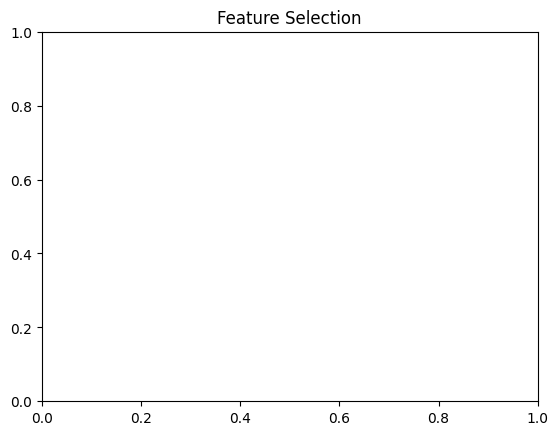

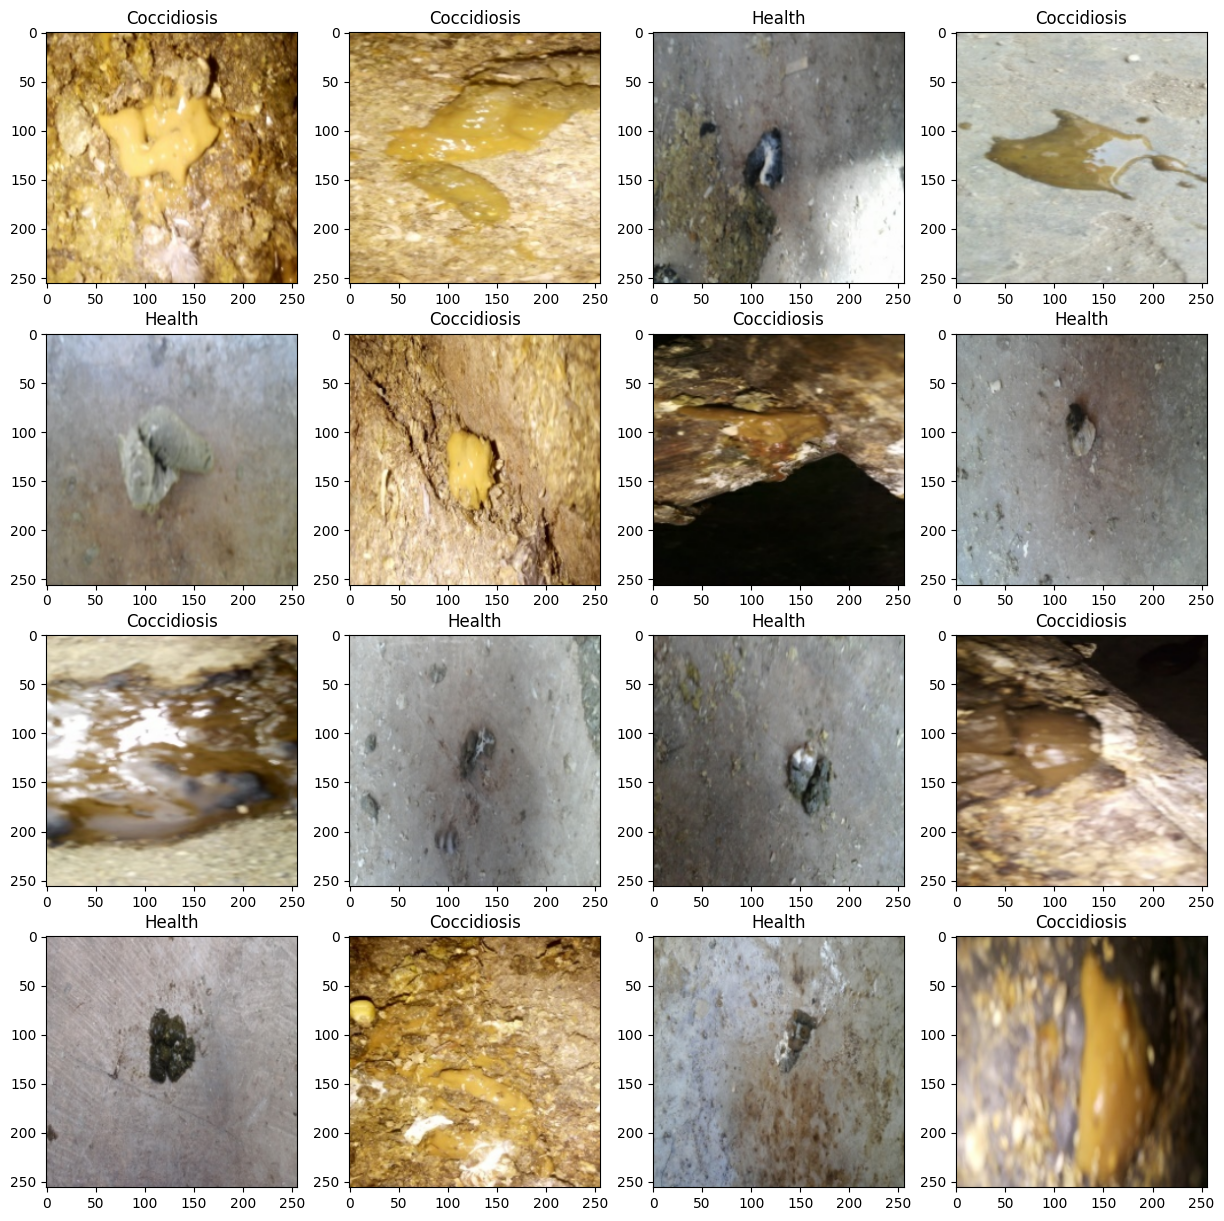

In [12]:
plt.title("Feature Selection")
plt.figure(figsize=(15,15))
# axis=plt.subplot(4,4,i+1)
# plt.imshow(image_batch[i].numpy().astype("uint8"))
# plt.title(class_names[label_batch[i]])
for image_batch,label_batch in dataset.take(1):
    for i in range(16):
        axis=plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
#     plt.axis("off")

In [13]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])
    

tf.Tensor(
[[[115.      113.      101.     ]
  [110.9375  110.5625   98.5625 ]
  [116.875   116.875   106.25   ]
  ...
  [194.625   193.625   188.9375 ]
  [195.4375  194.4375  190.4375 ]
  [193.      192.      188.     ]]

 [[117.4375  115.4375  103.4375 ]
  [115.35547 113.66016 101.66016]
  [116.16406 115.65625 105.03125]
  ...
  [195.4375  194.4375  189.75   ]
  [196.25    195.25    191.25   ]
  [193.8125  192.8125  188.8125 ]]

 [[122.125   118.75    106.75   ]
  [120.5     118.24219 105.68359]
  [115.87109 115.24609 103.46094]
  ...
  [196.3125  196.25781 189.9375 ]
  [197.2539  196.2539  191.5664 ]
  [195.375   194.375   189.6875 ]]

 ...

 [[158.625   161.25    147.9375 ]
  [162.4336  165.0586  151.7461 ]
  [168.125   170.75    158.38281]
  ...
  [216.3125  217.3125  209.9375 ]
  [216.125   217.125   211.125  ]
  [215.3125  216.3125  210.3125 ]]

 [[160.      164.      150.     ]
  [163.25    167.25    153.25   ]
  [168.8125  172.8125  158.8125 ]
  ...
  [217.      218.      210.

In [14]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("train")
train_size = 0.8
len(dataset)*train_size

Found 3737 files belonging to 2 classes.


93.60000000000001

In [15]:
train_ds = dataset.take(93)
len(train_ds)

93

In [16]:
test_ds = dataset.skip(93)
len(test_ds)


24

In [17]:
val_size = 0.1
len(dataset)* val_size

11.700000000000001

In [18]:
val_ds= test_ds.take(11)
len(val_ds)

11

In [19]:
test_ds= test_ds.skip(11)
len(test_ds)

13

In [20]:
def get_dataset_partitions_tf(ds, train_split=0.8,val_split=0.1,test_split=0.1, shuffle= True, shuffle_size= 10000):
    ds_size = len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size= int(val_split * ds_size)
    
    train_ds =ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [21]:
train_ds, val_ds, test_ds= get_dataset_partitions_tf(dataset)

In [22]:
len(train_ds)

93

In [23]:
len(val_ds)

11

In [24]:
len(test_ds)

13

In [25]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)

In [26]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
])

In [27]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
])

In [28]:
 for image_batch,label_batch in dataset.take(1):
        print(image_batch.shape)
        print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1]


In [29]:
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, channels)
no_classes=2
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation ='relu'),
    layers.Dense(no_classes, activation='softmax'),
])
model.build(input_shape= input_shape)

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [31]:
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
    metrics=['accuracy']
    
    )

In [32]:
history=model.fit(
    train_ds,
    epochs= EPOCHS,
    batch_size= BATCH_SIZE,
    verbose=1,
    validation_data= val_ds
    
)

Epoch 1/2
93/93 [==============================] - 989s 11s/step - loss: 0.2227 - accuracy: 0.9114 - val_loss: 0.2857 - val_accuracy: 0.9091
Epoch 2/2
93/93 [==============================] - 1161s 13s/step - loss: 0.0988 - accuracy: 0.9704 - val_loss: 0.0789 - val_accuracy: 0.9744


In [33]:
scores= model.evaluate(test_ds)

13/13 [==============================] - 127s 3s/step - loss: 0.1026 - accuracy: 0.9591


In [34]:
scores

[0.10260086506605148, 0.9591346383094788]

In [35]:
history

In [36]:
history.params

{'verbose': 1, 'epochs': 2, 'steps': 93}

In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
history.history['accuracy']

[0.9114179611206055, 0.9703603982925415]

In [39]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss= history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

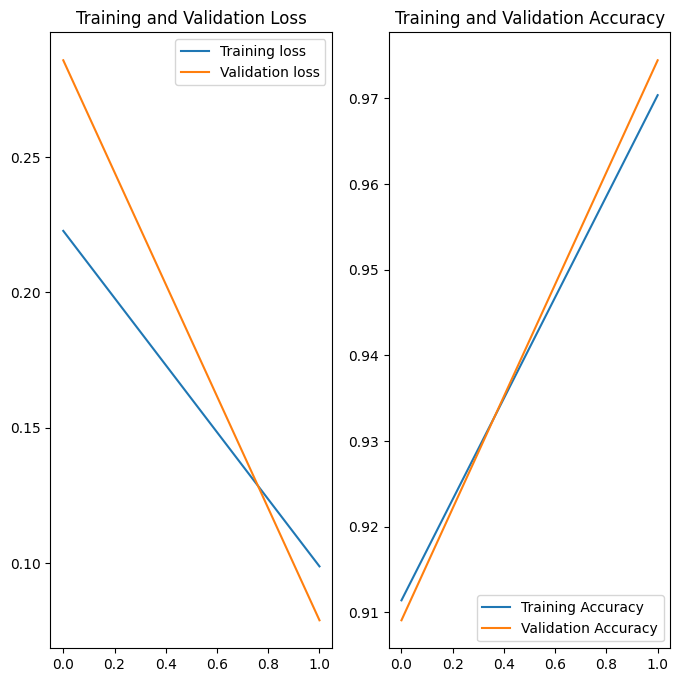

In [52]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,1)
plt.plot(range(EPOCHS), loss, label='Training loss')
plt.plot(range(EPOCHS), val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

This is the first image to predict
The label : Health
1/1 [==============================] - 6s 6s/step
Predicted label: Coccidiosis


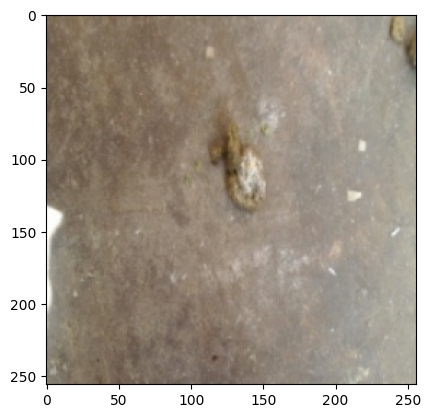

In [41]:
import numpy as np
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print('This is the first image to predict')
    plt.imshow(first_image)
    print('The label :', class_names[first_label])
    batch_prediction = model.predict(image_batch)
    print("Predicted label:" ,class_names[np.argmax(batch_prediction[0])])

In [42]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 131ms/step


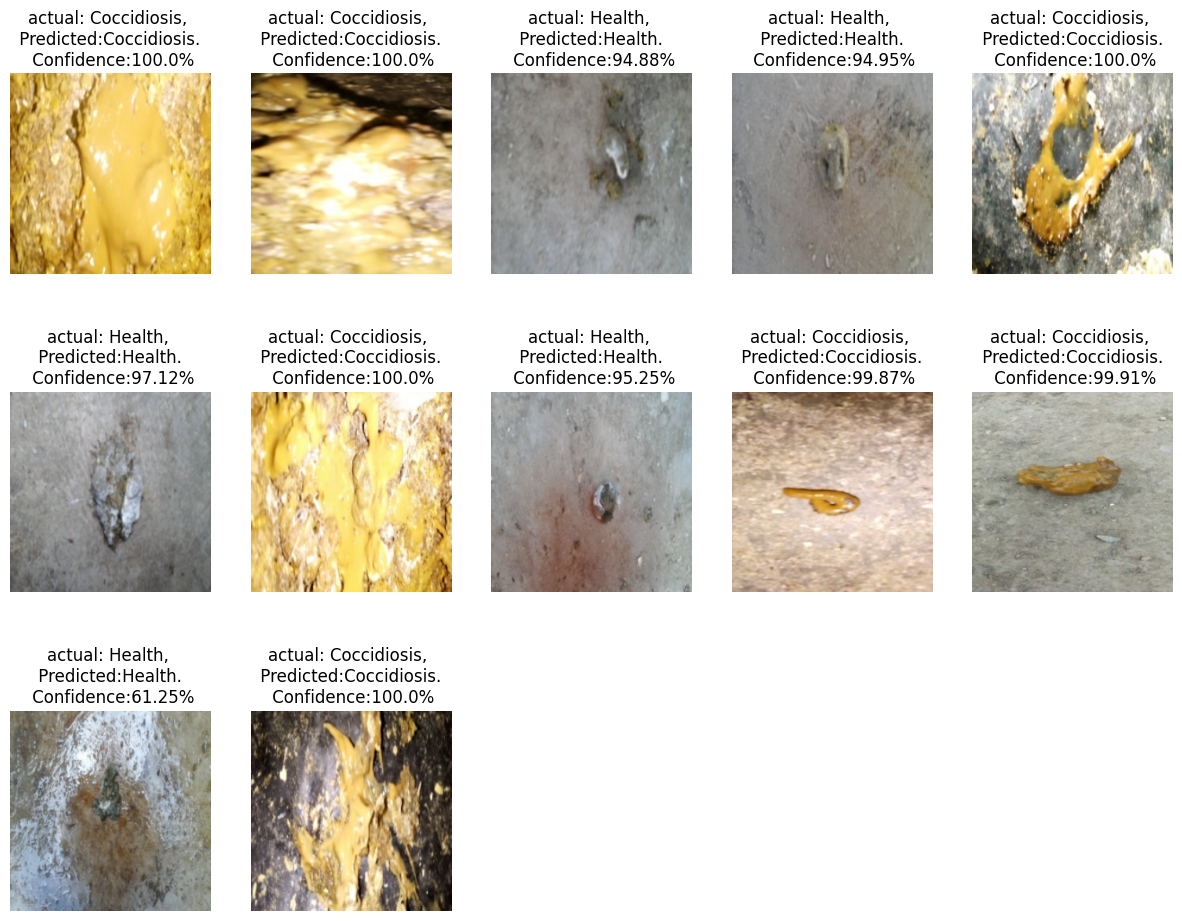

In [51]:
 
plt.figure(figsize=(15,20))
for images,labels in test_ds.take(1):
    for i in range(12):
        ax=plt.subplot(5,5, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
         
        predicted_class, confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f'actual: {actual_class}, \n Predicted:{predicted_class}. \n Confidence:{confidence}%')
        
        plt.axis("off")
    

In [44]:
# pip install matplotlib


In [45]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, channels)
# no_classes=2
# model = models.Sequential([
#     resize_and_rescale,
#     data_augmentation,
#     layers.Conv2D(32,(3,3),activation='relu', input_shape= input_shape),

# # # X is the input image matrix and y is the output variable
# # model = Sequential()
# # model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X.shape[1:]))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(X, y, epochs=10, batch_size=32)
# X_new = model.predict(X)

